In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

import warnings
warnings.filterwarnings('ignore')

In [2]:
f = open('years.txt', "r")
article_names = [fname.strip() for fname in f.readlines()] 

all_counts = pd.DataFrame()
for yname in article_names:
    asset_word_counts = {}
    with open(f"/scratch/m1ath02/text_dump_testing/{yname}_asset_words.csv") as f:
        word_list = f.readlines()

        # add to dictionary
        for word in word_list:
            key = word.split(',')[0]
            count = int(word.split(',')[1].strip())
            if key not in asset_word_counts:
                asset_word_counts[key] = count
            else:
                asset_word_counts[key] += count

        # store in data frame
        df = pd.DataFrame(list(asset_word_counts.items()))

        df = df.rename(columns= {0: "Word", 1: 'Count'})

        df['Year'] = yname
        
        # add to master df
        all_counts = pd.concat([all_counts, df])

In [3]:
all_counts = all_counts.sort_values(by=['Word', 'Year'])

In [8]:
all_counts.groupby("Word").sum()[["Count"]].sort_values(by="Count")/all_counts.sum()["Count"]

,Count
Word,
capitalization rate,0.000013
equity premia,0.000059
CRE,0.000143
bid-ask,0.000184
vacancy rate,0.000367
corporate spread,0.000409
leveraged loan,0.000626
default rate,0.000884
risk free,0.001029


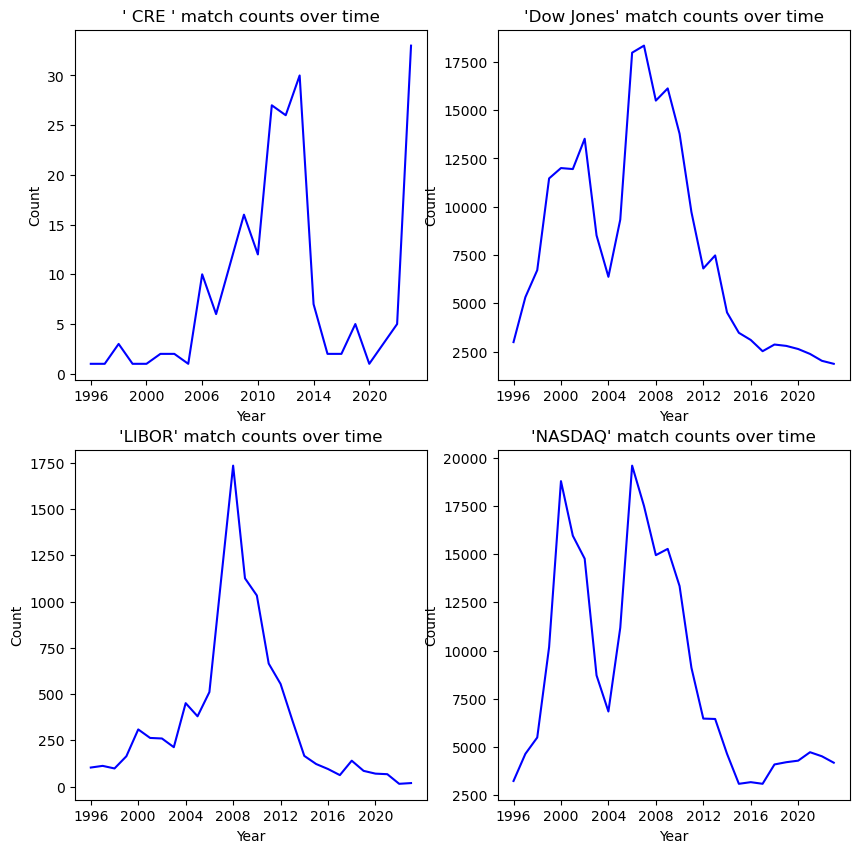

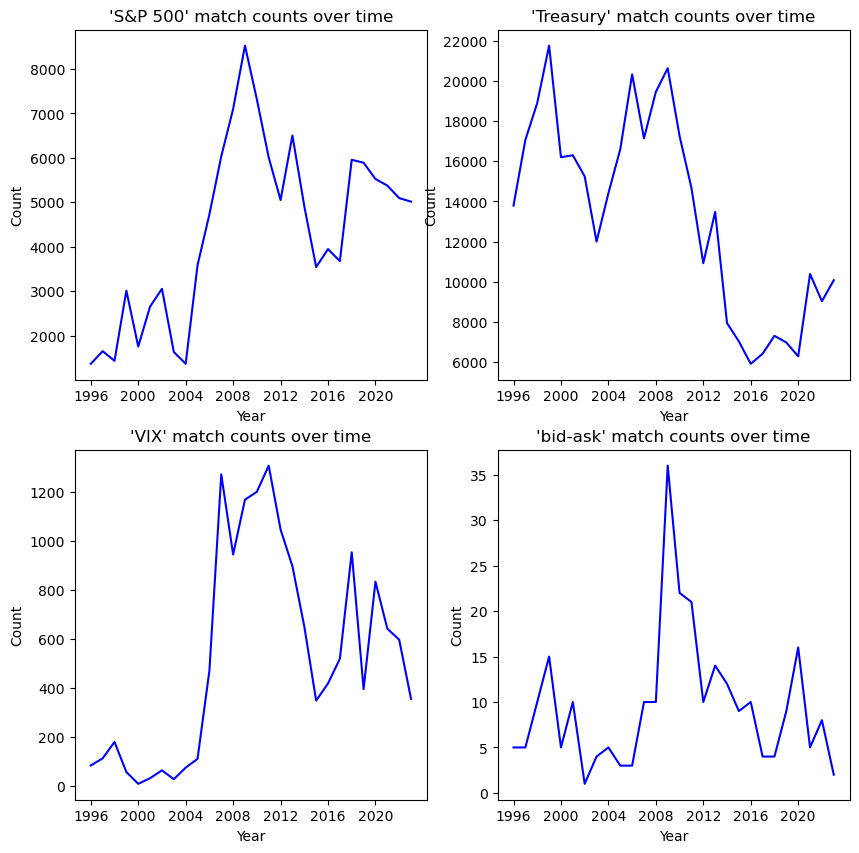

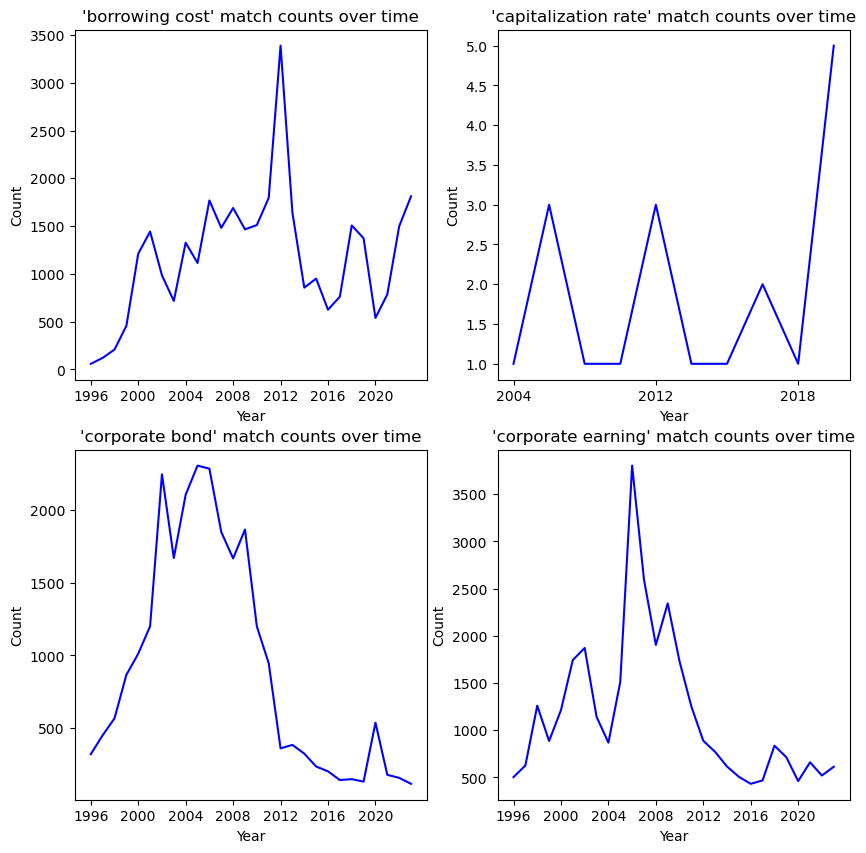

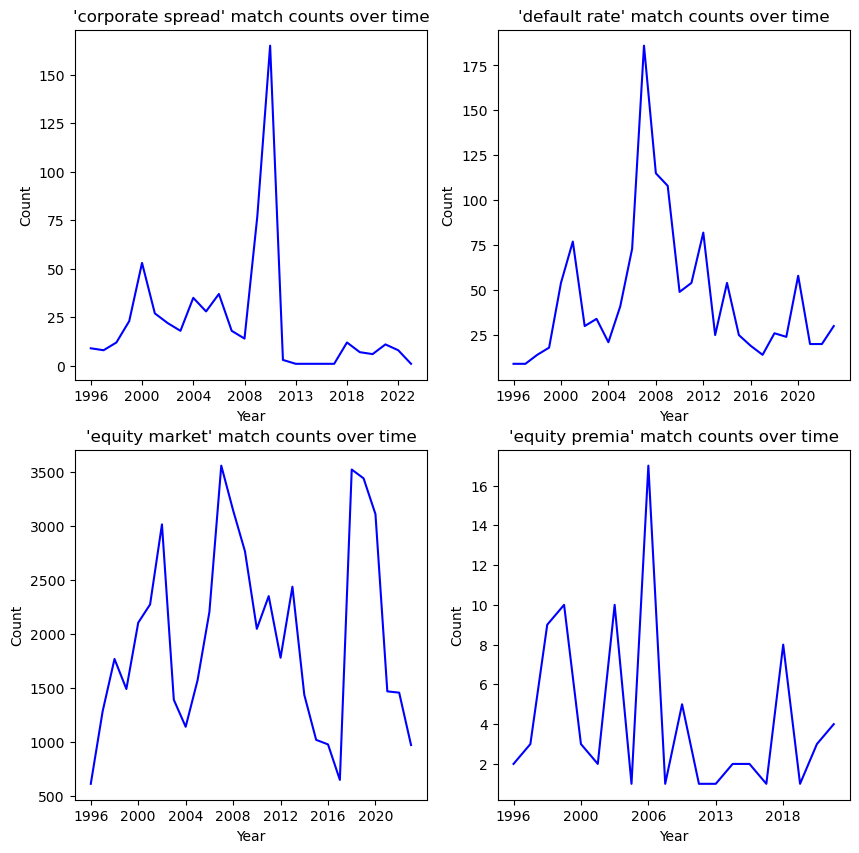

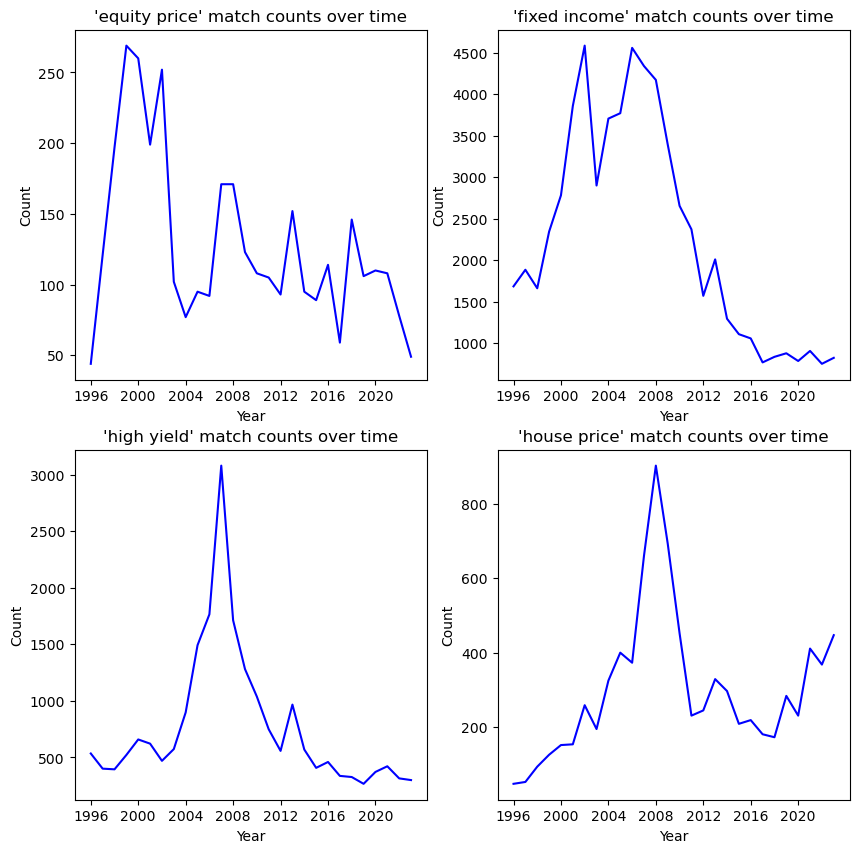

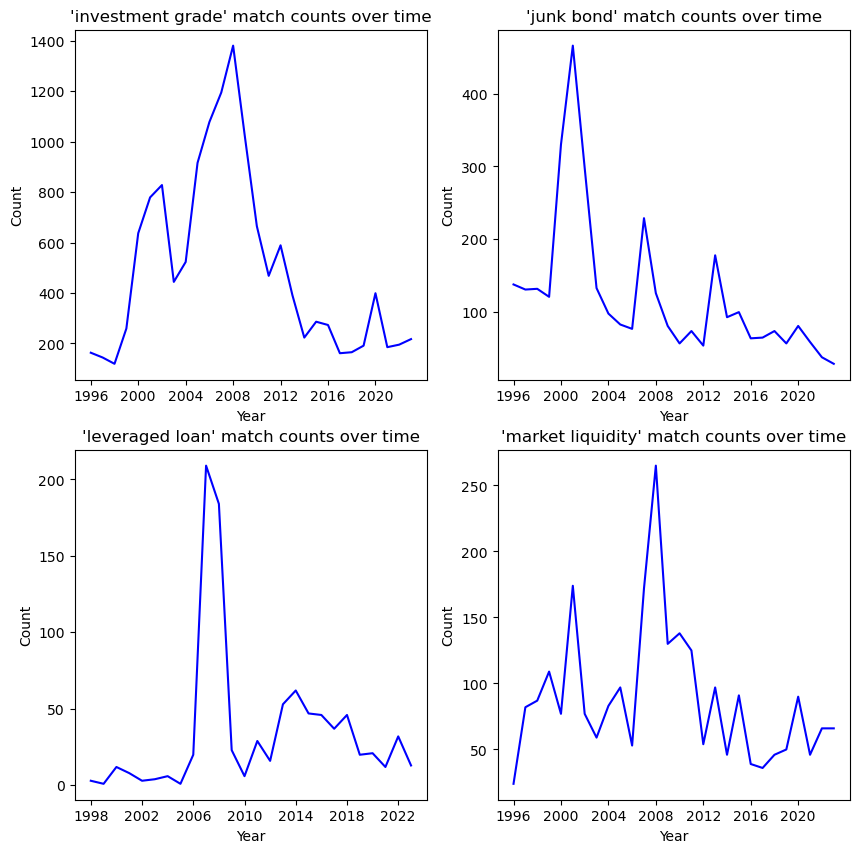

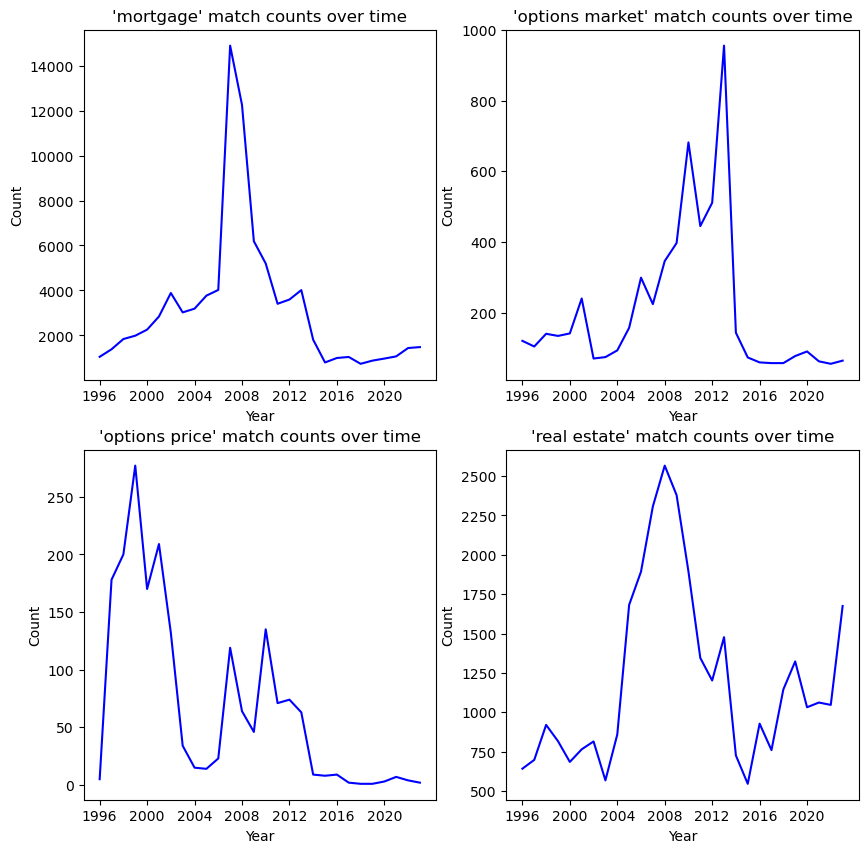

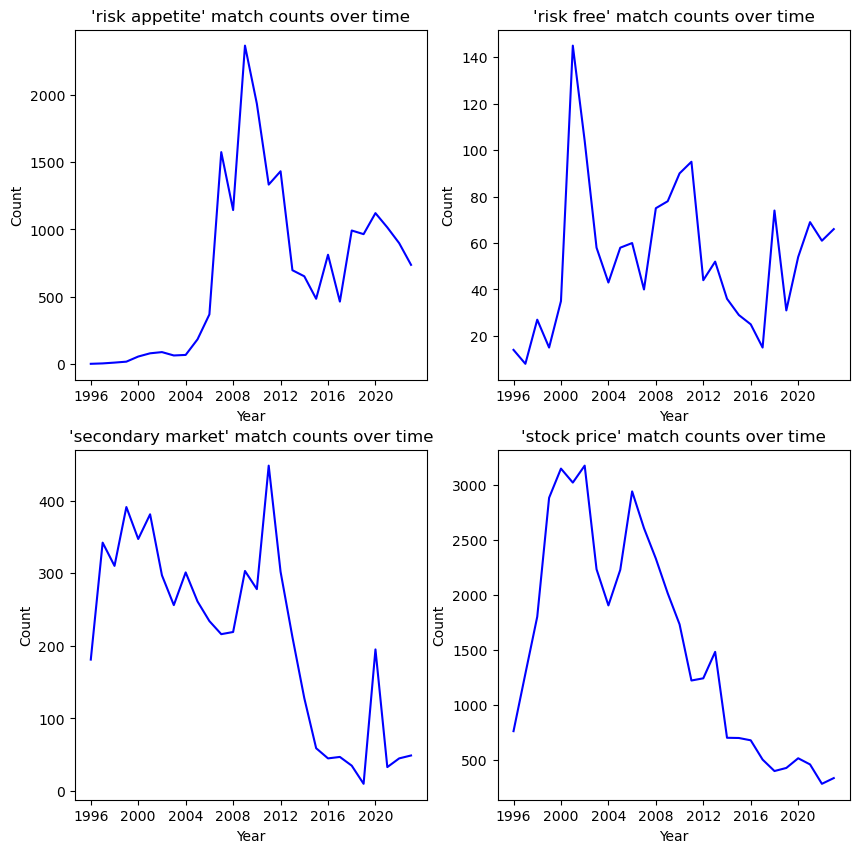

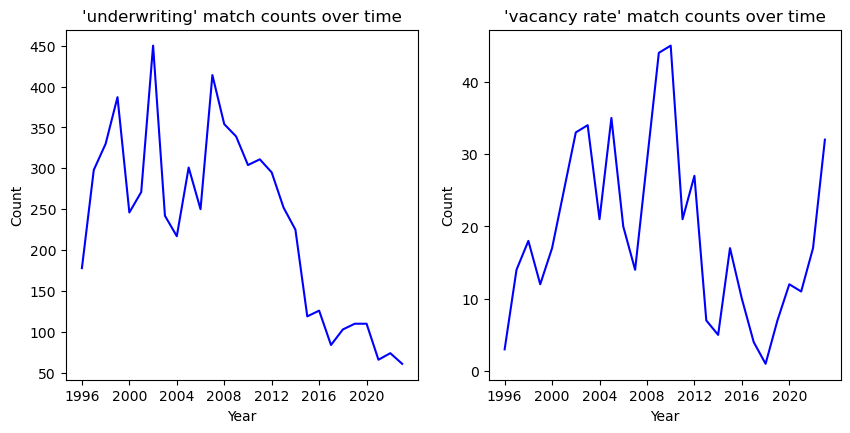

In [11]:
with PdfPages('/scratch/m1ath02/asset_word_counts.pdf') as pdf: 
    for i, word in enumerate(sorted(pd.unique(all_counts['Word']))):

        if i % 4 == 0:
            fig = plt.figure(figsize=(10,10))
        

        ax = fig.add_subplot(2, 2, i % 4 + 1)

        word_df = all_counts[all_counts['Word'] == word]

        y = word_df['Count']
        x = range(len(word_df['Year']))
        x_labs = [str(i) for i in word_df['Year'].to_list()]

        ax.plot(x, y, color='blue', label='Sentiment')

        ax.set_title(f"'{word}' match counts over time")
        ax.set_xlabel('Year')
        ax.set_ylabel('Count')

        ax.set_xticks(np.arange(min(x), max(x)+1, 4))
        ax.set_xticklabels(x_labs[0:len(x_labs):4])

        if i % 4 == 0:
            pdf.savefig(fig)


In [12]:
all_counts.to_csv("/scratch/m1ath02/all_asset_counts.csv", index=False)

In [9]:
# random stuff - what are months with biggest EBP movements
ebp = pd.read_csv("/ofs/research3/project_HZ/VAR/data/ebp_csv.csv")

In [13]:
ebp = ebp[["date", "ebp"]]
ebp["diff"] = ebp["ebp"].diff()

In [19]:
ebp.sort_values(by="diff").tail(15)

,date,ebp,diff
464,9/1/2011,0.436605,0.543111
82,11/1/1979,-0.152313,0.556165
18,7/1/1974,1.226800,0.557851
428,9/1/2008,1.801302,0.579421
466,11/1/2011,0.495773,0.590393
17,6/1/1974,0.668949,0.593546
354,7/1/2002,1.532595,0.595762
162,7/1/1986,0.730821,0.617855
86,3/1/1980,0.238445,0.651988
158,3/1/1986,0.599155,0.767931


In [ ]:
/